<a href="https://colab.research.google.com/github/Nurimamasbait/SQA/blob/master/Copy_Label_kamus_Terbaru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Masukan data hasil processing
df = pd.read_csv('data_hasil_bersih.csv')
df

,stemming
0,elah lulus
1,hapus universitas
2,kampus emang gaada skripsi
3,biasa ujiannasional hapus pas lulus skripsi
4,generasi coba nyimak
...,...
1918,alhamdulillah rezeki emang dak libur semester ...
1919,skripsi syarat wajib lulus mayoritas kampus iy...
1920,capres lulus tidak wajib skripsi tugas ganti p...
1921,yaampun senang kelar sidang magang alhamdulill...


In [3]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json
import reprlib

# Memanfaatkan nltk VADER untuk menggunakan leksikon kustom
sia1A, sia1B, sia2 = SentimentIntensityAnalyzer(), SentimentIntensityAnalyzer(), SentimentIntensityAnalyzer()
# membersihkan leksikon VADER default
sia1A.lexicon.clear()
sia1B.lexicon.clear()
sia2.lexicon.clear()

# Membaca leksikon InSet
# Leksikon InSet lexicon dibagi menjadi dua, yakni polaritas negatif dan polaritas positif;
# kita akan menggunakan nilai compound saja untuk memberi label pada suatu kalimat
with open('/content/2negatif.txt') as f:
    data1A = f.read()
with open('/content/2positif.txt') as f:
    data1B = f.read()


# Mengubah leksikon sebagai dictionary
insetNeg = json.loads(data1A)
insetPos = json.loads(data1B)

# Update leksikon VADER yang sudah 'dimodifikasi'
sia1A.lexicon.update(insetNeg)
sia1B.lexicon.update(insetPos)

print(reprlib.repr(sia1A.lexicon))
print(reprlib.repr(sia1B.lexicon))

JSONDecodeError: Extra data: line 1 column 10 (char 9)

In [ ]:
#import library nltk
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [ ]:
#fungsi untuk tokenizing menggunakan word_tokenize yang ada pada nltk
def tokenize_text(text):
  tokens = nltk.tokenize.word_tokenize(text)
  return tokens

df["token"]= df['stemming'].apply(tokenize_text)
df.head()

,stemming,token
0,elah lulus,"[elah, lulus]"
1,hapus universitas,"[hapus, universitas]"
2,kampus emang gaada skripsi,"[kampus, emang, gaada, skripsi]"
3,biasa ujiannasional hapus pas lulus skripsi,"[biasa, ujiannasional, hapus, pas, lulus, skri..."
4,generasi coba nyimak,"[generasi, coba, nyimak]"


In [ ]:
#Kamus lexicon
import csv

lexicon_positive = dict()
with open('/content/2positif.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
lexicon_negative = dict()
import csv
with open('/content/2negatif.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# fungcion to determine sentiment polarity
def sentiment_analysis__lexicon_indonesia(text):
  score = 0
  for word in text:
    if (word in lexicon_positive):
      score = score + lexicon_positive[word]
  for word in text:
    if (word in lexicon_negative):
      score = score + lexicon_negative[word]
  polarity=''
  if (score > 0):
    polarity = 'positive'
  elif (score < 0):
    polarity = 'negative'
  else:
    polarity = 'neutral'
  return score, polarity


In [ ]:
result = df['token'].apply(sentiment_analysis__lexicon_indonesia)
result = list(zip(*result))
df['polarity_score'] = result[0]
df['polarity'] = result[1]
print(df['polarity'].value_counts()),df.shape

neutral     1010
positive     533
negative     380
Name: polarity, dtype: int64


(None, (1923, 4))

In [ ]:
df

,stemming,token,polarity_score,polarity
0,elah lulus,"[elah, lulus]",0,neutral
1,hapus universitas,"[hapus, universitas]",0,neutral
2,kampus emang gaada skripsi,"[kampus, emang, gaada, skripsi]",0,neutral
3,biasa ujiannasional hapus pas lulus skripsi,"[biasa, ujiannasional, hapus, pas, lulus, skri...",0,neutral
4,generasi coba nyimak,"[generasi, coba, nyimak]",-1,negative
...,...,...,...,...
1918,alhamdulillah rezeki emang dak libur semester ...,"[alhamdulillah, rezeki, emang, dak, libur, sem...",1,positive
1919,skripsi syarat wajib lulus mayoritas kampus iy...,"[skripsi, syarat, wajib, lulus, mayoritas, kam...",1,positive
1920,capres lulus tidak wajib skripsi tugas ganti p...,"[capres, lulus, tidak, wajib, skripsi, tugas, ...",0,neutral
1921,yaampun senang kelar sidang magang alhamdulill...,"[yaampun, senang, kelar, sidang, magang, alham...",2,positive


In [ ]:
df.to_csv('pelabelan no 2.csv', index=False, header=True)

1923


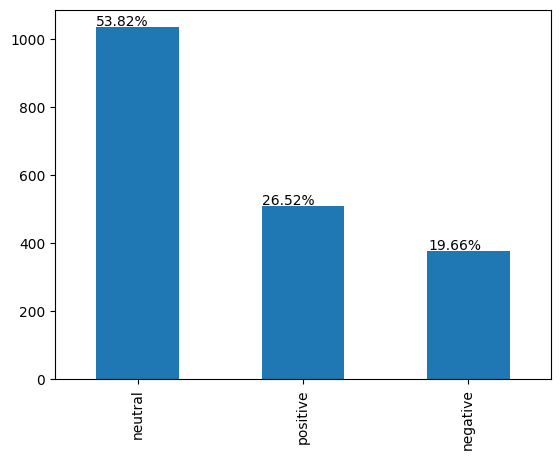

In [ ]:
s = pd.value_counts(df["polarity"])
ax = s.plot.bar()
n = len(df.index)
print (n)
for p in ax.patches:
   ax.annotate(str(round(p.get_height() / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

In [ ]:
df.to_csv('label_manual.csv', r = False, header = True, index_label=None)

TypeError: NDFrame.to_csv() got an unexpected keyword argument 'r'